In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

- Here are the visualizations used to answer the Business Questions

In [2]:
df = pd.read_csv('fortune_2000_in_2021_cleaned_transformed.csv')

# 1. Which countries have the highest number of companies in the list?

In [3]:
# Dataframe of the top 20 countries based on number of companies in the list
df_countries_highest = pd.DataFrame(df['Country'].value_counts().head(20))
# Add an index and value for others:
df_countries_highest.loc['Others'] = len(df) - int(df_countries_highest['Country'].sum())
df_countries_highest

,Country
United States,590
China,291
Japan,215
United Kingdom,66
South Korea,62
Hong Kong,59
Canada,56
Germany,54
France,53
India,50


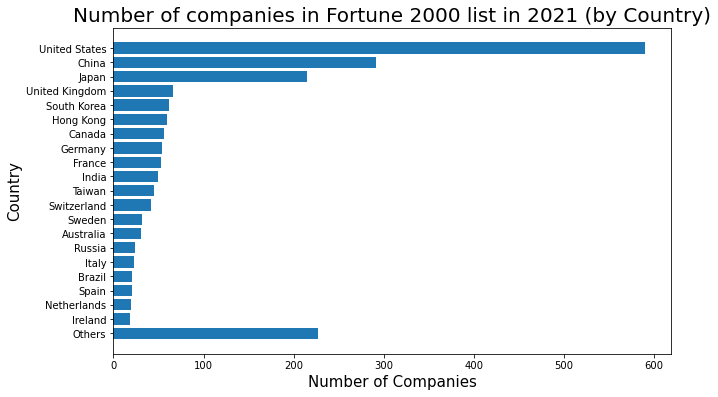

In [4]:
plt.figure(figsize=(10,6))
plt.barh(df_countries_highest.index, df_countries_highest["Country"])

plt.title("Number of companies in Fortune 2000 list in 2021 (by Country)", size=20, loc="center")
plt.xlabel('Number of Companies', size=15)
plt.ylabel('Country', size=15)

plt.gca().invert_yaxis()
plt.show()

# 2. What share of companies on the list do the big two (USA and China) have in comparison to the rest of the world?

In [5]:
# Dataframe of top 2 countries (USA and China and others) based on number of companies in the list
df_us_china_others = pd.DataFrame(df['Country'].value_counts().head(2))
# Add an index and value for others:
df_us_china_others.loc['Others'] = len(df) - int(df_us_china_others['Country'].sum())
df_us_china_others

,Country
United States,590
China,291
Others,1119


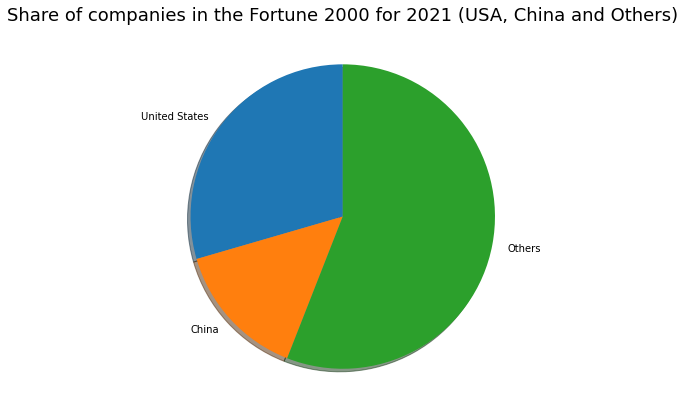

In [6]:
# Create a pie chart
plt.figure(figsize=(10,7))
plt.pie(df_us_china_others['Country'], labels=df_us_china_others.index, startangle=90, shadow=True)
plt.title("Share of companies in the Fortune 2000 for 2021 (USA, China and Others)", size=18)
plt.show()

# 3. Which countries have the highest number of companies in the list that turned a profit in 2021?

In [7]:
# Create a True or False column called 'In Profit'
def greater_than_0(x):
    if x > 0:
        return True
    else:
        return False
df['In profit'] = df['Profit (in millions)'].apply(greater_than_0)
df.head(2)

,Rank,Name,Country,Sales,Profit,Assets,Market Value,Sales (in millions),Profit (in millions),Assets (in millions),Market Value (in millions),In profit
0,1,ICBC,China,$190.5 B,$45.8 B,"$4,914.7 B",$249.5 B,190500.0,45800.0,4914700.0,249500.0,True
1,2,JPMorgan Chase,United States,$136.2 B,$40.4 B,"$3,689.3 B",$464.8 B,136200.0,40400.0,3689300.0,464800.0,True


In [8]:
# Group by 'Country' and 'In Profit' and unstack and reset the index
df_countries_in_profit = df.groupby(["Country","In profit"]).size().unstack(fill_value=0).rename_axis(None, axis=1).reset_index()
# Cast result to a dataframe
df_countries_in_profit = pd.DataFrame(df_countries_in_profit)
df_countries_in_profit

,Country,False,True
0,Argentina,2,0
1,Australia,8,23
2,Austria,1,8
3,Bahrain,0,1
4,Bangladesh,0,1
...,...,...,...
56,United Arab Emirates,0,9
57,United Kingdom,12,54
58,United States,106,484
59,Venezuela,0,1


In [9]:
# Rename columns and order by most companies in profit
df_countries_in_profit.columns = ['Country', 'Not In Profit', 'In Profit']
df_countries_in_profit.sort_values('In Profit', ascending=False, inplace=True)
df_countries_in_profit_top_20 = df_countries_in_profit.head(20)

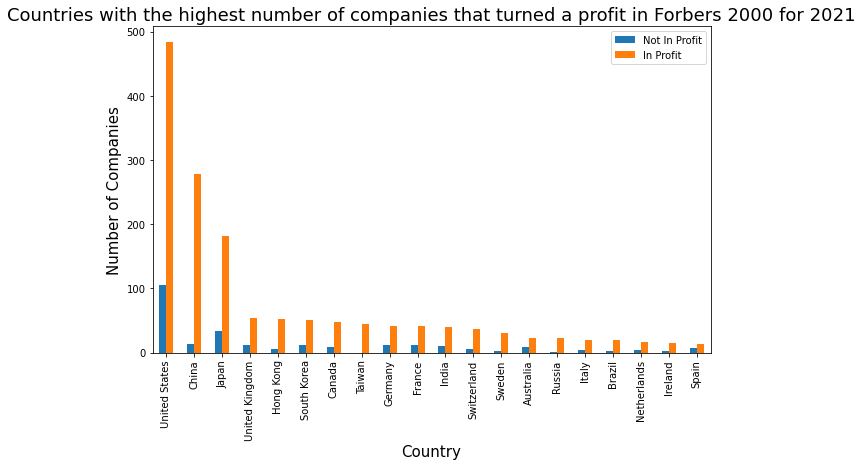

In [10]:
# Create a grouped bar chart
chart = df_countries_in_profit_top_20.plot(kind="bar", x="Country", xlabel="Country", ylabel="In Profit", title="Highest number of companies in profit by country 2021")

# Retrieve matplotlib figure to format chart size
fig = chart.get_figure()
fig.set_size_inches(10, 6)

plt.xlabel('Country', size=15)
plt.ylabel('Number of Companies', size=15)

plt.title("Countries with the highest number of companies that turned a profit in Forbers 2000 for 2021", size=18)

plt.show()

# 4. Which countries have the fewest number of companies in the list that turned a profit in 2021? 

In [11]:
# Order by lowest number of companies in profit
df_countries_in_profit.sort_values('In Profit', ascending=True, inplace=True)
df_countries_in_profit_bottom_20 = df_countries_in_profit.head(20)

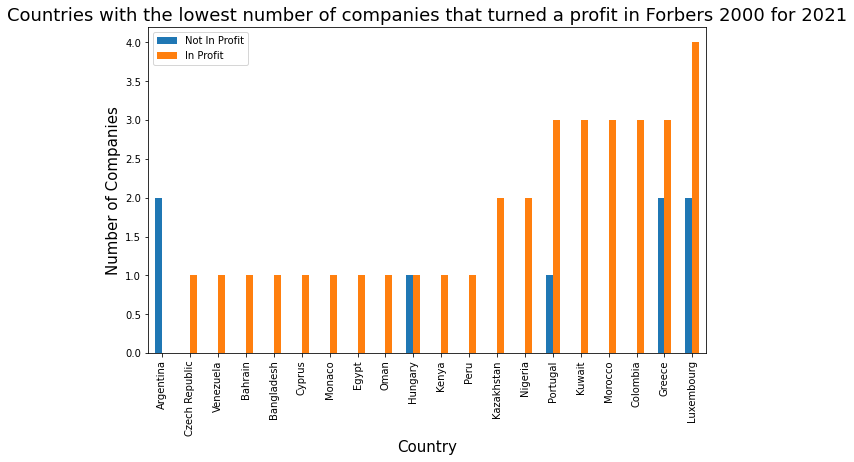

In [12]:
# Create a grouped bar chart
chart = df_countries_in_profit_bottom_20.plot(kind="bar", x="Country", xlabel="Country", ylabel="In Profit", title="Highest number of companies in profit by country 2021")

# Retrieve matplotlib figure to format chart size
fig = chart.get_figure()
fig.set_size_inches(10, 6)

plt.xlabel('Country', size=15)
plt.ylabel('Number of Companies', size=15)

plt.title("Countries with the lowest number of companies that turned a profit in Forbers 2000 for 2021", size=18)

plt.show()

# 5. What are the top 20 countries based on average profit per company in the list?

In [13]:
# Create pivot table calculating average profit per company
df_average_profit = df.pivot_table(index='Country', values="Profit (in millions)", aggfunc="mean")

# Sort values and get top 20
df_average_profit.sort_values("Profit (in millions)", ascending=False, inplace=True)
df_average_profit_top_20 = df_average_profit.head(20)
df_average_profit_top_20

,Profit (in millions)
Country,
Saudi Arabia,4681.469231
Venezuela,3600.000000
China,2036.035739
Switzerland,1736.433333
Russia,1674.608333
United States,1657.088644
Denmark,1417.716667
Australia,1267.145161
Canada,1235.437500


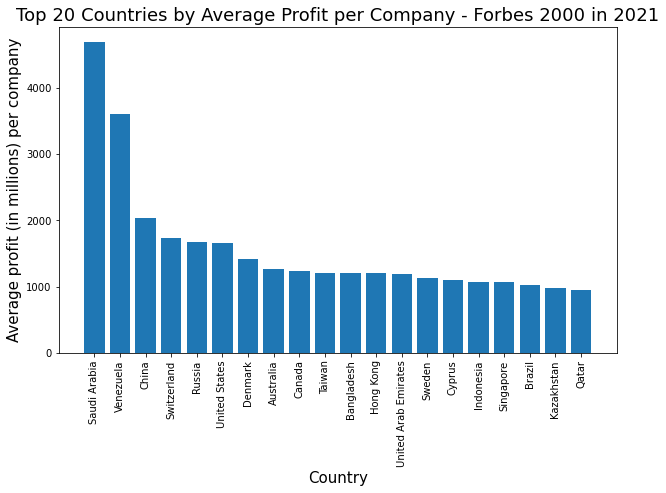

In [14]:
# Create a chart
plt.figure(figsize=(10,6))
# make bar plot with matplotlib
plt.bar(df_average_profit_top_20.index, 'Profit (in millions)',data=df_average_profit_top_20)
plt.xlabel("Country", size=15)
plt.ylabel("Average profit (in millions) per company", size=15)
plt.title("Top 20 Countries by Average Profit per Company - Forbes 2000 in 2021", size=18)
plt.xticks(rotation=90)
plt.show()

# 6. Of the 10 most profitable companies, which have the best profit to sales ratio?

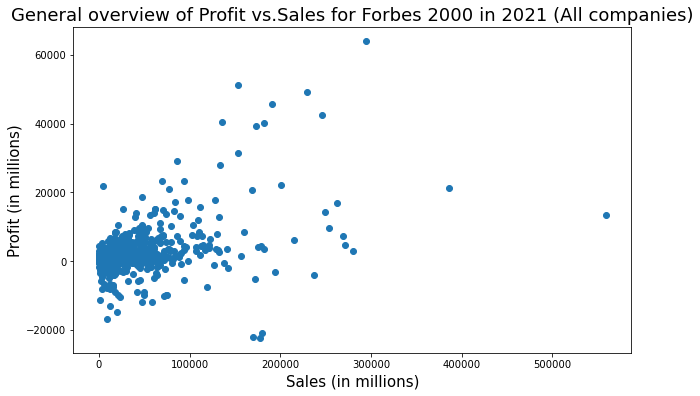

In [15]:
# Create a scatter chart to give an overview of Profit vs. Sales
plt.figure(figsize=(10,6))

plt.xlabel('Sales (in millions)', size=15)
plt.ylabel('Profit (in millions)', size=15)

plt.title("General overview of Profit vs.Sales for Forbes 2000 in 2021 (All companies)", size=18)

plt.scatter(df['Sales (in millions)'], df['Profit (in millions)'])
plt.show()

In [16]:
# Create a new profit to sales ratio column
df['Profit to Sales ratio'] = (df['Profit (in millions)'] / df['Sales (in millions)']) * 100

In [17]:
df_profit_to_sales_ratio = df.sort_values("Profit (in millions)", ascending=False).head(10)
df_profit_to_sales_ratio

,Rank,Name,Country,Sales,Profit,Assets,Market Value,Sales (in millions),Profit (in millions),Assets (in millions),Market Value (in millions),In profit,Profit to Sales ratio
5,6,Apple,United States,$294 B,$63.9 B,$354.1 B,"$2,252.3 B",294000.0,63900.0,354100.0,2252300.0,True,21.734694
14,15,Microsoft,United States,$153.3 B,$51.3 B,$304.1 B,"$1,966.6 B",153300.0,51300.0,304100.0,1966600.0,True,33.463796
4,5,Saudi Arabian Oil Company (Saudi Aramco),Saudi Arabia,$229.7 B,$49.3 B,$510.3 B,"$1,897.2 B",229700.0,49300.0,510300.0,1897200.0,True,21.462778
0,1,ICBC,China,$190.5 B,$45.8 B,"$4,914.7 B",$249.5 B,190500.0,45800.0,4914700.0,249500.0,True,24.041995
2,3,Berkshire Hathaway,United States,$245.5 B,$42.5 B,$873.7 B,$624.4 B,245500.0,42500.0,873700.0,624400.0,True,17.311609
1,2,JPMorgan Chase,United States,$136.2 B,$40.4 B,"$3,689.3 B",$464.8 B,136200.0,40400.0,3689300.0,464800.0,True,29.662261
12,13,Alphabet,United States,$182.4 B,$40.3 B,$319.6 B,"$1,538.9 B",182400.0,40300.0,319600.0,1538900.0,True,22.094298
3,4,China Construction Bank,China,$173.5 B,$39.3 B,"$4,301.7 B",$210.4 B,173500.0,39300.0,4301700.0,210400.0,True,22.651297
8,9,Agricultural Bank of China,China,$153.9 B,$31.3 B,"$4,159.9 B",$140.1 B,153900.0,31300.0,4159900.0,140100.0,True,20.337882
32,33,Facebook,United States,$86 B,$29.1 B,$159.3 B,$870.5 B,86000.0,29100.0,159300.0,870500.0,True,33.837209


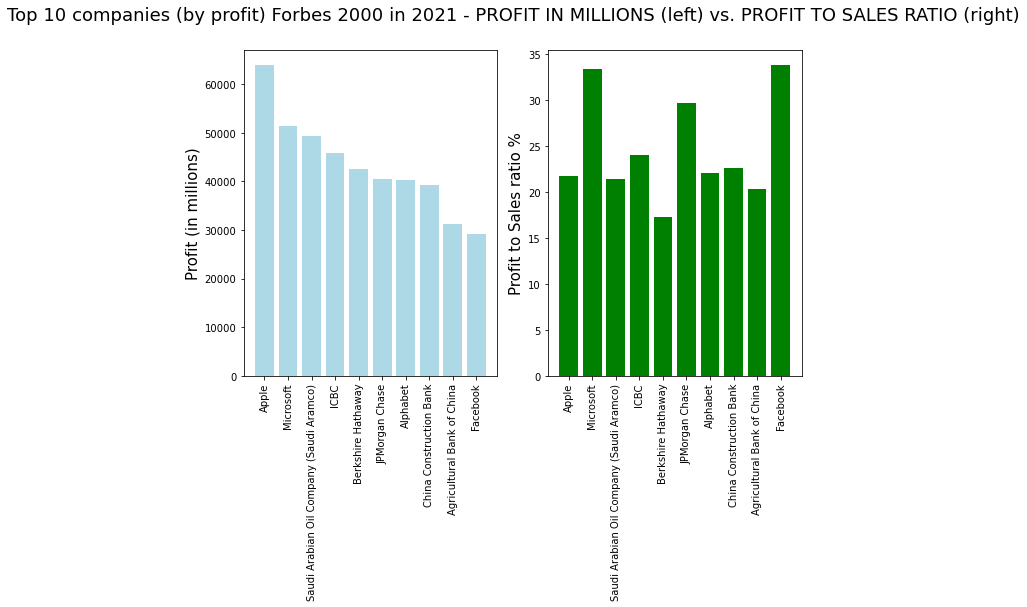

In [18]:
# Display side by side using subplots - profit chart next to Profit to Sales
plt.figure(figsize=(10,6))

#plot 1:
plt.subplot(1, 2, 1)
plt.bar('Name','Profit (in millions)', data=df_profit_to_sales_ratio, color="lightblue")
plt.xlabel(None)
plt.ylabel("Profit (in millions)", size=15)
plt.xticks(rotation=90)

#plot 2:
plt.subplot(1, 2, 2)
plt.bar('Name','Profit to Sales ratio', data=df_profit_to_sales_ratio, color="green")
plt.ylabel("Profit to Sales ratio %", size=15)
plt.xticks(rotation=90)

# Super title
plt.suptitle("Top 10 companies (by profit) Forbes 2000 in 2021 - PROFIT IN MILLIONS (left) vs. PROFIT TO SALES RATIO (right)", size=18)
plt.show()

# 7. What are the top 20 companies in terms of assets?

In [19]:
df_top_assets = df.sort_values('Assets (in millions)', ascending=False).head(20)

In [20]:
df_top_assets

,Rank,Name,Country,Sales,Profit,Assets,Market Value,Sales (in millions),Profit (in millions),Assets (in millions),Market Value (in millions),In profit,Profit to Sales ratio
0,1,ICBC,China,$190.5 B,$45.8 B,"$4,914.7 B",$249.5 B,190500.0,45800.0,4914700.0,249500.0,True,24.041995
3,4,China Construction Bank,China,$173.5 B,$39.3 B,"$4,301.7 B",$210.4 B,173500.0,39300.0,4301700.0,210400.0,True,22.651297
8,9,Agricultural Bank of China,China,$153.9 B,$31.3 B,"$4,159.9 B",$140.1 B,153900.0,31300.0,4159900.0,140100.0,True,20.337882
297,298,Fannie Mae,United States,$109.6 B,$11.8 B,"$3,986.1 B",$2.8 B,109600.0,11800.0,3986100.0,2800.0,True,10.766423
13,14,Bank of China,China,$134 B,$27.9 B,"$3,731.4 B",$116.7 B,134000.0,27900.0,3731400.0,116700.0,True,20.820896
1,2,JPMorgan Chase,United States,$136.2 B,$40.4 B,"$3,689.3 B",$464.8 B,136200.0,40400.0,3689300.0,464800.0,True,29.662261
51,52,Mitsubishi UFJ Financial,Japan,$56 B,$5.2 B,"$3,406.5 B",$69.7 B,56000.0,5200.0,3406500.0,69700.0,True,9.285714
29,30,BNP Paribas,France,$102.7 B,$7.6 B,"$3,044.8 B",$79.1 B,102700.0,7600.0,3044800.0,79100.0,True,7.400195
39,40,HSBC Holdings,United Kingdom,$60.6 B,$4 B,"$2,984.2 B",$120.3 B,60600.0,4000.0,2984200.0,120300.0,True,6.600660
86,87,Japan Post Holdings,Japan,$106.6 B,$4.2 B,"$2,879 B",$34.8 B,106600.0,4200.0,2879000.0,34800.0,True,3.939962


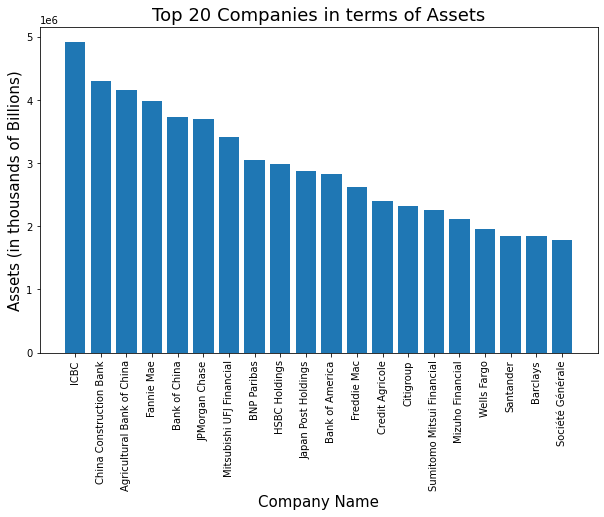

In [21]:
plt.figure(figsize=(10,6))
# make bar plot with matplotlib
plt.bar('Name', 'Assets (in millions)',data=df_top_assets)
plt.xlabel("Company Name", size=15)
plt.ylabel("Assets (in thousands of Billions)", size=15)
plt.title("Top 20 Companies in terms of Assets", size=18)
plt.xticks(rotation=90)
plt.show()